# WeatherPy
----

3 Trends:
1. The first may be obvious, but the first scatterplot shows that max temperature of a city varies based on latitiude. More specifically, max tempurature is the greatest closest to a latitude magnitude of 0. Max temperature is the lowest with the magnitude of latitude increases. 
2. There is a positive correlation between humidity and latitude in the northern hemisphere.  As the latitude increases, the humidity increases. 
3. In the linear regression view, it is clear that cloudiness does not depend on hemisphere does not have a strong correlation with latitude either way.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
print()

## Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# API Call
api_key = weather_api_key

# Save config information
#url = "http://api.openweathermap.org/data/2.5/weather?"
test_cities = ["jamestown", "ibra"]

# Build query URL
#query_url = url + "appid=" + api_key + "&q=" + test_cities
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key

# empty lists to append the API data into lists 
city_ = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
long = []
max_temp = []
wind_speed = []

# Start the call counter 
record = 1

# Header of list
print(f"Beginning Data Retrieval")
print(f"----------------------------------------")

#Loop through the cities to obtain list information
for city in cities:  
    
    # loop through cities to apend info
    try: 
        response = requests.get(f"{url}&q={city}").json() 
        city_.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        long.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        print(f"Processing Record {record} | {city_record}")
        #print(f"{url}&q={city}")
        # add 1 to the counter 
        
        record= record + 1
        
        # wait 3 seconds to give api time to load
        time.sleep(3)
        
    # If no record found "skip" to next call
    except:
        print("City not found.")
    continue

# End log
print(f"----------------------------------")
print(f"Data Retrieval Complete")
print(f"----------------------------------")

Beginning Data Retrieval
----------------------------------------
Processing Record 1 | Bredasdorp
Processing Record 2 | Kiryat Gat
Processing Record 3 | Albany
Processing Record 4 | Punta Arenas
Processing Record 5 | Ekhabi
City not found.
Processing Record 6 | Rikitea
Processing Record 7 | Kavaratti
Processing Record 8 | Butaritari
Processing Record 9 | Dubbo
City not found.
Processing Record 10 | Hermanus
Processing Record 11 | Saint-Philippe
Processing Record 12 | Korla
Processing Record 13 | Iranshahr
Processing Record 14 | Ejea de los Caballeros
Processing Record 15 | Ushuaia
City not found.
Processing Record 16 | Mēga
Processing Record 17 | Cabo San Lucas
Processing Record 18 | Barrow
Processing Record 19 | Homer
Processing Record 20 | Kathu
Processing Record 21 | Mataura
Processing Record 22 | Lebu
Processing Record 23 | Ilulissat
City not found.
Processing Record 24 | Cape Town
Processing Record 25 | Dunmore Town
Processing Record 26 | Balad
Processing Record 27 | Saskylakh
Pr

Processing Record 234 | Phalombe
Processing Record 235 | Kargasok
Processing Record 236 | Elverum
Processing Record 237 | Gilbués
Processing Record 238 | Bethel
Processing Record 239 | Faanui
Processing Record 240 | Dakar
City not found.
Processing Record 241 | Qaqortoq
Processing Record 242 | Bani Walid
Processing Record 243 | Barranca
Processing Record 244 | Asti
Processing Record 245 | São João da Barra
Processing Record 246 | Rosario
Processing Record 247 | Nuuk
Processing Record 248 | Uspenka
Processing Record 249 | Severo-Kuril'sk
Processing Record 250 | Marsá Maţrūḩ
Processing Record 251 | Olafsvik
Processing Record 252 | Yaan
Processing Record 253 | Kumul
Processing Record 254 | Polazna
Processing Record 255 | Husavik
Processing Record 256 | Portland
Processing Record 257 | Charlestown
Processing Record 258 | Russell
Processing Record 259 | Thinadhoo
Processing Record 260 | Tanah Merah
Processing Record 261 | Behshahr
Processing Record 262 | Opuwo
Processing Record 263 | Nishih

Processing Record 474 | Mackay
Processing Record 475 | Tuatapere
City not found.
Processing Record 476 | Alegrete
Processing Record 477 | Porto Velho
City not found.
City not found.
Processing Record 478 | Itārsi
Processing Record 479 | Topaowan
Processing Record 480 | Norman Wells
Processing Record 481 | Sitka
Processing Record 482 | Guarujá
Processing Record 483 | Sisimiut
City not found.
Processing Record 484 | Bontang
City not found.
Processing Record 485 | Havre-St-Pierre
Processing Record 486 | Piney Green
Processing Record 487 | Mbarara
Processing Record 488 | Bosaso
Processing Record 489 | Chabahar
Processing Record 490 | Nemuro
Processing Record 491 | Ubari
Processing Record 492 | Tabas
City not found.
Processing Record 493 | Fort Nelson
City not found.
Processing Record 494 | Southbridge
City not found.
Processing Record 495 | Mikhaylovka
Processing Record 496 | Dorog
Processing Record 497 | Mattru
Processing Record 498 | Bilibino
Processing Record 499 | Saint-Paul
Processing

## Convert Raw Data to DataFrame
* Save as csv

In [6]:
# create dictionary
weather_dict = {"City": city_,"Country": country,"Date": date,"Latitude": lat,"Longitude": long,"Max Temperature": max_temp,"Humidity": humidity,"Cloudiness": cloudiness,"Wind Speed": wind_speed}

#create dataframe with dictionary info
raw_data_df = pd.DataFrame(weather_dict)
raw_data_df.head()

,City,Country,Date,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed
0,Bredasdorp,ZA,1603033142,-34.53,20.04,69.80,52,59,13.87
1,Kiryat Gat,IL,1603033145,31.61,34.76,82.40,58,0,10.29
2,Albany,US,1603032871,42.60,-73.97,50.00,75,75,9.33
3,Punta Arenas,CL,1603033151,-53.15,-70.92,44.60,75,40,26.40
4,Ekhabi,RU,1603033155,53.51,142.97,35.28,93,96,23.58


In [7]:
# save df as csv
raw_data_df.to_csv("../output_data/raw_data.csv", index=False, header=True)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

### Latitude vs. Temperature Plot

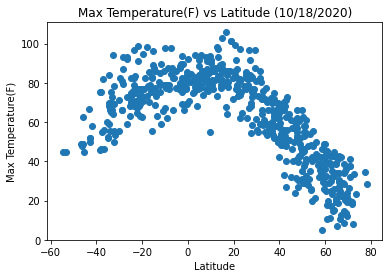

This code is assigning latitude to the x-values and max temp to the y-values and plotting
a scatterplot to show the correlation between the two variables.  From the scatterplot it looks like
there is significant correlation, the relationship functions like a bell curve


<Figure size 432x288 with 0 Axes>

In [28]:
# Create a Scatter Plot for temperature vs latitude
today = time.strftime("%m/%d/%Y")
x_values = raw_data_df['Latitude']
y_values = raw_data_df['Max Temperature']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature(F)')
plt.title(f'Max Temperature(F) vs Latitude ({today})')
plt.show()
plt.savefig("../output_data/Fig1.png")

print("This code is assigning latitude to the x-values and max temp to the y-values and plotting")
print("a scatterplot to show the correlation between the two variables.  From the scatterplot it looks like")
print("there is significant correlation, the relationship functions like a bell curve")

### Latitude vs. Humidity Plot

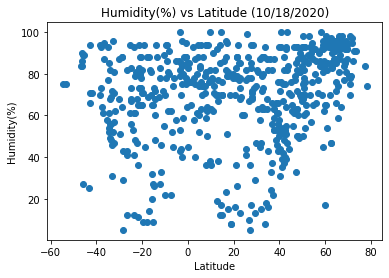

This code is assigning latitude to the x-values and humidity to the y-values and plotting
a scatterplot to show the correlation between the two variables.  From the scatterplot it looks like
there is not significant correlation


<Figure size 432x288 with 0 Axes>

In [29]:
today = time.strftime("%m/%d/%Y")
x_values = raw_data_df['Latitude']
y_values = raw_data_df['Humidity']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')
plt.title(f'Humidity(%) vs Latitude ({today})')
plt.show()
plt.savefig("../output_data/Fig2.png")

print("This code is assigning latitude to the x-values and humidity to the y-values and plotting")
print("a scatterplot to show the correlation between the two variables.  From the scatterplot it looks like")
print("there is not significant correlation")

### Latitude vs. Cloudiness Plot

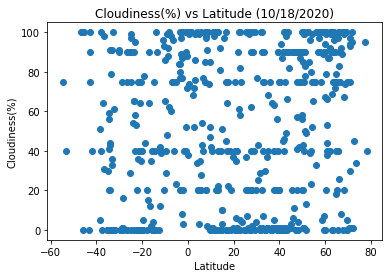

This code is assigning latitude to the x-values and cloudiness to the y-values and plotting
a scatterplot to show the correlation between the two variables.  From the scatterplot it looks like
there is not a significant correlation as the graph is evenly scattered.


<Figure size 432x288 with 0 Axes>

In [30]:
today = time.strftime("%m/%d/%Y")
x_values = raw_data_df['Latitude']
y_values = raw_data_df['Cloudiness']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')
plt.title(f'Cloudiness(%) vs Latitude ({today})')
plt.show()
plt.savefig("../output_data/Fig3.png")

print("This code is assigning latitude to the x-values and cloudiness to the y-values and plotting")
print("a scatterplot to show the correlation between the two variables.  From the scatterplot it looks like")
print("there is not a significant correlation as the graph is evenly scattered.")

### Latitude vs. Wind Speed Plot

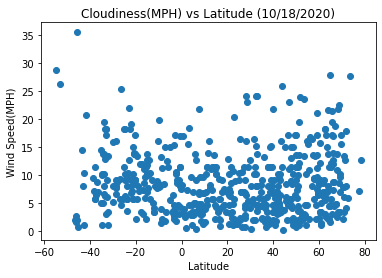

This code is assigning latitude to the x-values and wind speed to the y-values and plotting
a scatterplot to show the correlation between the two variables.  From the scatterplot it looks like
there is not a significant correlation.


<Figure size 432x288 with 0 Axes>

In [31]:
today = time.strftime("%m/%d/%Y")
x_values = raw_data_df['Latitude']
y_values = raw_data_df['Wind Speed']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed(MPH)')
plt.title(f'Cloudiness(MPH) vs Latitude ({today})')
plt.show()
plt.savefig("../output_data/Fig4.png")

print("This code is assigning latitude to the x-values and wind speed to the y-values and plotting")
print("a scatterplot to show the correlation between the two variables.  From the scatterplot it looks like")
print("there is not a significant correlation.")

## Linear Regression

### Write linear regression plot function (optional)

###  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

Regression line equation is: y = -1.01x + 96.69


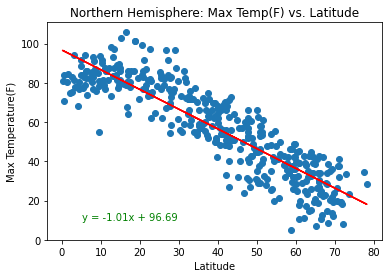

This scatterplot graphs the relationship between max temp and latitude of a city in the northern hemisphere.
It is evident that there is a negative correlation, for every one unit drop in latitude, there is a 1.01 degrees (F)
drop in max temp.


<Figure size 432x288 with 0 Axes>

In [39]:
# determine what is norther and southern
# Create Northern and Southern Hemisphere DataFrames
northern_df = raw_data_df.loc[pd.to_numeric(raw_data_df["Latitude"]).astype(float) > 0, :]
southern_df = raw_data_df.loc[pd.to_numeric(raw_data_df["Latitude"]).astype(float) < 0, :]

x_values = pd.to_numeric(northern_df['Latitude']).astype(float)
y_values = pd.to_numeric(northern_df['Max Temperature']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5,10),fontsize=10,color="green")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature(F)')
plt.title('Northern Hemisphere: Max Temp(F) vs. Latitude')
plt.show()
plt.savefig("../output_data/Fig5.png")

print("This scatterplot graphs the relationship between max temp and latitude of a city in the northern hemisphere.")
print("It is evident that there is a negative correlation, for every one unit drop in latitude, there is a 1.01 degrees (F)")
print("drop in max temp.")

###  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

Regression line equation is: y = 0.6x + 85.89


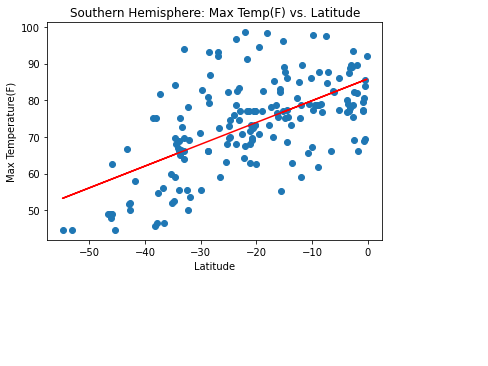

This scatterplot graphs the relationship between max temp and latitude of a city in the Southern hemisphere.
It is evident that there is a positive correlation, for every one unit increase in latitude, there is a 0.6 degrees (F)
increase in max temp.


<Figure size 432x288 with 0 Axes>

In [40]:
x_values = pd.to_numeric(southern_df['Latitude']).astype(float)
y_values = pd.to_numeric(southern_df['Max Temperature']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5,10),fontsize=10,color="green")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature(F)')
plt.title('Southern Hemisphere: Max Temp(F) vs. Latitude')
plt.show()
plt.savefig("../output_data/Fig6.png")

print("This scatterplot graphs the relationship between max temp and latitude of a city in the Southern hemisphere.")
print("It is evident that there is a positive correlation, for every one unit increase in latitude, there is a 0.6 degrees (F)")
print("increase in max temp.")

###  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Regression line equation is: y = 0.3x + 60.39


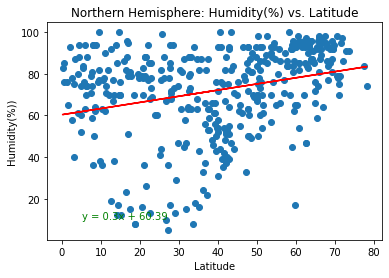

This scatterplot graphs the relationship between humidity and latitude of a city in the Northern hemisphere.
There is a positive correlation, for every one unit increase in latitude, there is a 0.3 unit
increase in humidity.


<Figure size 432x288 with 0 Axes>

In [42]:
x_values = pd.to_numeric(northern_df['Latitude']).astype(float)
y_values = pd.to_numeric(northern_df['Humidity']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5,10),fontsize=10,color="green")
plt.xlabel('Latitude')
plt.ylabel('Humidity(%))')
plt.title('Northern Hemisphere: Humidity(%) vs. Latitude')
plt.show()
plt.savefig("../output_data/Fig7.png")

print("This scatterplot graphs the relationship between humidity and latitude of a city in the Northern hemisphere.")
print("There is a positive correlation, for every one unit increase in latitude, there is a 0.3 unit")
print("increase in humidity.")

###  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Regression line equation is: y = 0.03x + 66.62


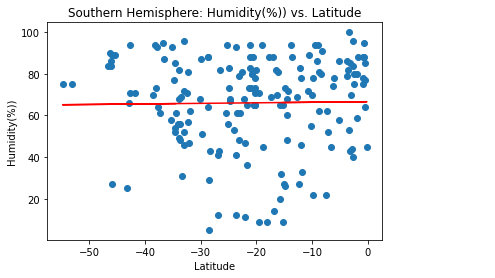

In [22]:
x_values = pd.to_numeric(southern_df['Latitude']).astype(float)
y_values = pd.to_numeric(southern_df['Humidity']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5,10),fontsize=10,color="green")
plt.xlabel('Latitude')
plt.ylabel('Humidity(%))')
plt.title('Southern Hemisphere: Humidity(%)) vs. Latitude')
plt.show()
plt.savefig("../output_data/Fig8.png")

print("This scatterplot graphs the relationship between humidity and latitude of a city in the Southern hemisphere.")
print("There is no strong correlation, for every one unit increase in latitude, there is a 0.03 unit")
print("increase in humidity which is not a convincing correlation.")

###  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Regression line equation is: y = 0.35x + 37.9


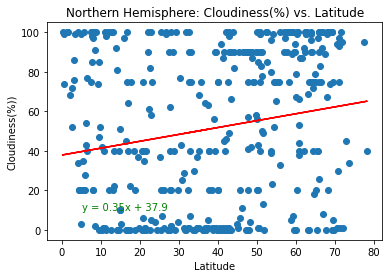

This scatterplot graphs the relationship between cloudiness and latitude of a city in the Northern hemisphere.
There is no strong correlation, for every one unit increase in latitude, there is a 0.35 unit
increase in cloudiness.


<Figure size 432x288 with 0 Axes>

In [43]:
x_values = pd.to_numeric(northern_df['Latitude']).astype(float)
y_values = pd.to_numeric(northern_df['Cloudiness']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5,10),fontsize=10,color="green")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%))')
plt.title('Northern Hemisphere: Cloudiness(%) vs. Latitude')
plt.show()
plt.savefig("../output_data/Fig9.png")

print("This scatterplot graphs the relationship between cloudiness and latitude of a city in the Northern hemisphere.")
print("There is no strong correlation, for every one unit increase in latitude, there is a 0.35 unit")
print("increase in cloudiness.")

###  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Regression line equation is: y = 0.28x + 54.24


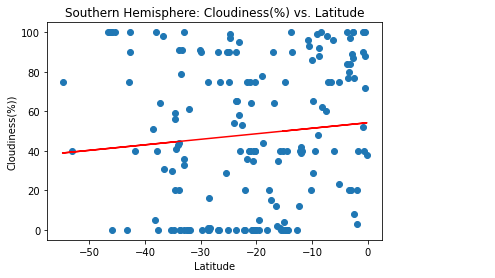

This scatterplot graphs the relationship between cloudiness and latitude of a city in the Southern hemisphere.
There is no strong correlation, for every one unit increase in latitude, there is a 0.28 unit
increase in cloudiness.


<Figure size 432x288 with 0 Axes>

In [44]:
x_values = pd.to_numeric(southern_df['Latitude']).astype(float)
y_values = pd.to_numeric(southern_df['Cloudiness']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5,10),fontsize=10,color="green")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%))')
plt.title('Southern Hemisphere: Cloudiness(%) vs. Latitude')
plt.show()
plt.savefig("../output_data/Fig10.png")

print("This scatterplot graphs the relationship between cloudiness and latitude of a city in the Southern hemisphere.")
print("There is no strong correlation, for every one unit increase in latitude, there is a 0.28 unit")
print("increase in cloudiness.")

###  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Regression line equation is: y = 0.05x + 5.96


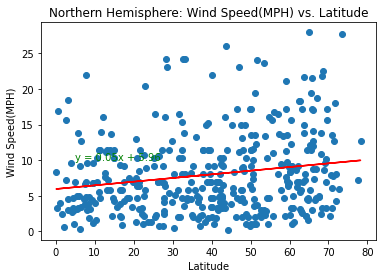

This scatterplot graphs the relationship between wind speed and latitude of a city in the Northern hemisphere.
There is no strong correlation, for every one unit increase in latitude, there is a 0.05 unit
increase in wind speed.


<Figure size 432x288 with 0 Axes>

In [45]:
x_values = pd.to_numeric(northern_df['Latitude']).astype(float)
y_values = pd.to_numeric(northern_df['Wind Speed']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5,10),fontsize=10,color="green")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed(MPH)')
plt.title('Northern Hemisphere: Wind Speed(MPH) vs. Latitude')
plt.show()
plt.savefig("../output_data/Fig11.png")

print("This scatterplot graphs the relationship between wind speed and latitude of a city in the Northern hemisphere.")
print("There is no strong correlation, for every one unit increase in latitude, there is a 0.05 unit")
print("increase in wind speed.")

###  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Regression line equation is: y = -0.08x + 7.61


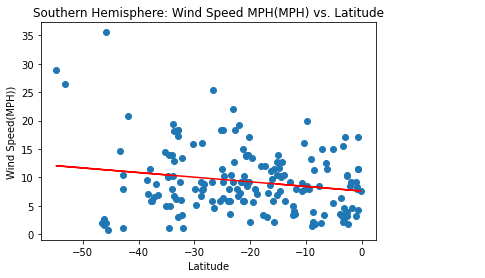

This scatterplot graphs the relationship between wind speed and latitude of a city in the Southern hemisphere.
There is no strong correlation, for every one unit increase in latitude, there is a -0.08 unit
decrease in wind speed.


<Figure size 432x288 with 0 Axes>

In [46]:
x_values = pd.to_numeric(southern_df['Latitude']).astype(float)
y_values = pd.to_numeric(southern_df['Wind Speed']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5,10),fontsize=10,color="green")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed(MPH))')
plt.title('Southern Hemisphere: Wind Speed MPH(MPH) vs. Latitude')
plt.show()
plt.savefig("../output_data/Fig12.png")

print("This scatterplot graphs the relationship between wind speed and latitude of a city in the Southern hemisphere.")
print("There is no strong correlation, for every one unit increase in latitude, there is a -0.08 unit")
print("decrease in wind speed.")